# PORTFOLIO MOVING AVERAGE (PMA)

In [1]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import itable
import ffn
import talib

def side_by_side(*objs, **kwds):
    from pandas.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))

In [2]:
import ffn

from fintools.Parameters import Parameters
from fintools.set_start_end import set_start_end
from fintools.get_yahoo_prices import get_yahoo_prices
from fintools.compute_weights_RS_DM import compute_weights_RS_DM
from fintools.endpoints import endpoints
from fintools.backtest import backtest
from fintools.monthly_return_table import monthly_return_table
from fintools.show_return_table import show_return_table

%matplotlib inline

# PMA001

INCEPTION DATES:

          inception
Symbols            
VCVSX    1999-12-31
VFIIX    1999-12-31
VUSTX    1999-12-31
FIRST BUY DATE = 2000-02-29 00:00:00



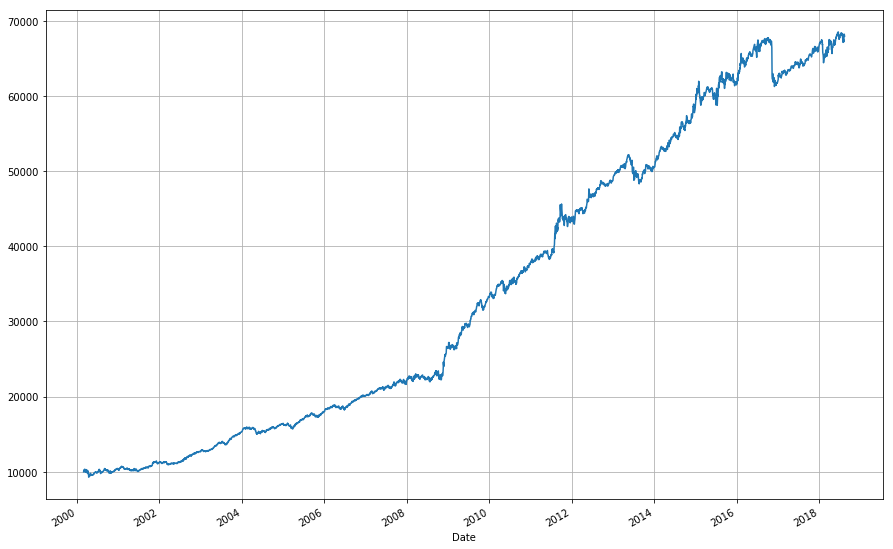

In [3]:
start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

symbols =['VCVSX', 'VFIIX']
cash_proxy = 'VUSTX'

risk_lookback = 3
allocations = [0.6, 0.4]
frequency = 'M'

tickers = list(set(symbols + [cash_proxy]))

# Define which online source one should use
data_source = 'yahoo'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)
data = panel_data['Adj Close'].sort_index(ascending=True)

inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period=frequency, trading_days=prices.index)
prices_m = prices.loc[end_points]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = prices_m.rolling(risk_lookback).mean().dropna()
rebalance_dates = SMA.index
rule = prices_m.reindex(rebalance_dates)[symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [4]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 2000-02-29 00:00:00 - 2018-08-14 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
579.28%             1.49  10.94%  -10.30%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y     incep.
-----  -----  -----  -----  -----  -----  -----  ------  --------
0.43%  1.00%  4.54%  2.19%  5.82%  2.87%  6.63%  11.69%  10.94%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.49     1.54       1.67
mean    10.65%   10.63%     11.15%
vol     7.15%    6.90%      6.69%
skew    -0.19    0.61       0.47
kurt    5.68     5.49       -0.14
best    3.19%    12.07%     25.68%
worst   -3.91%   -7.86%     0.70%

Drawdowns:
max      avg       # days
-------  ------  --------
-10.30%  -0.96%     19.56

Misc:
---------------  -------
avg. up month    1.70%
avg. down month  -1.30%
up year %        100.00%
12m up %         94.8

In [6]:
show_return_table(p_value)

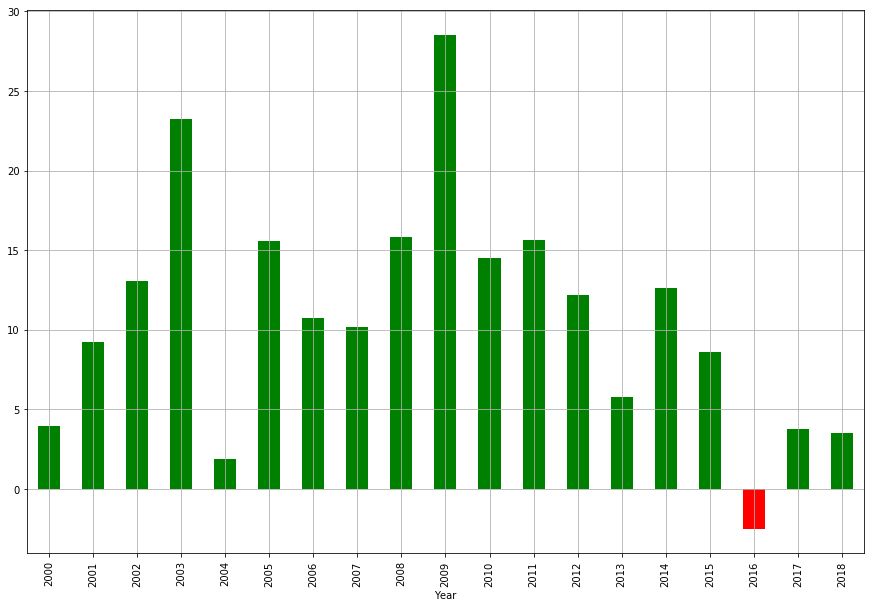

In [9]:
df = monthly_return_table(p_value)
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# PMA002

INCEPTION DATES:

          inception
Symbols            
VCVSX    1999-12-31
VUSTX    1999-12-31
VWEHX    1999-12-31
VWINX    1999-12-31
FIRST BUY DATE = 2000-02-29 00:00:00



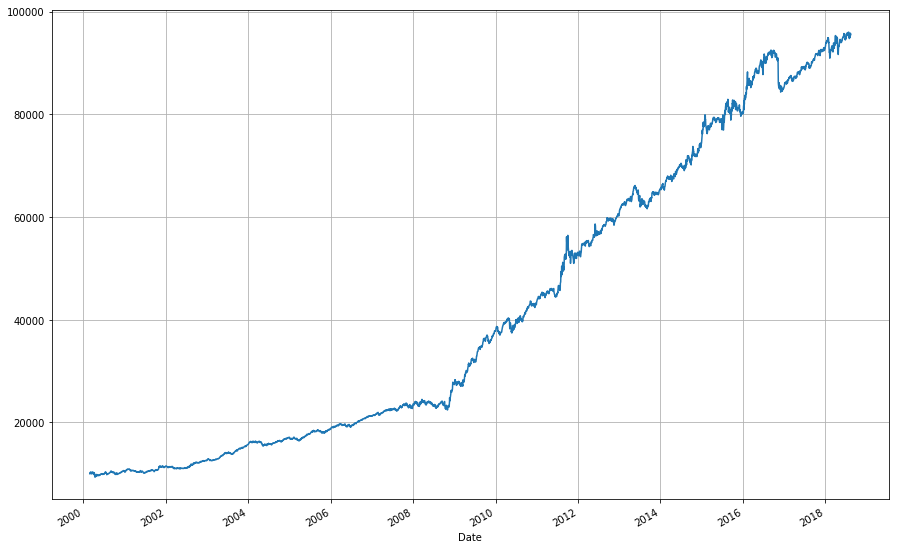

In [10]:
symbols =['VCVSX', 'VWINX', 'VWEHX']
cash_proxy = 'VUSTX'

tickers = list(set(symbols + [cash_proxy]))

start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Define which online source one should use
data_source = 'yahoo'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)
data = panel_data['Adj Close'].sort_index(ascending=True)
    
inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period='M', trading_days=prices.index)
prices_m = prices.loc[end_points]

risk_lookback = 3
allocations = [0.6, 0.2, 0.2]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = prices_m.rolling(risk_lookback).mean().dropna()
rebalance_dates = SMA.index
rule = prices_m.reindex(rebalance_dates)[symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [11]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 2000-02-29 00:00:00 - 2018-08-14 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
855.08%             1.53  13.01%  -9.76%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y     incep.
-----  -----  -----  -----  -----  -----  -----  ------  --------
0.28%  1.17%  3.90%  2.77%  6.86%  5.22%  8.70%  15.10%  13.01%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.53     1.55       1.59
mean    12.59%   12.58%     13.26%
vol     8.23%    8.09%      8.31%
skew    0.11     0.87       1.74
kurt    6.03     3.38       3.65
best    4.47%    12.07%     37.94%
worst   -3.45%   -6.47%     2.77%

Drawdowns:
max     avg       # days
------  ------  --------
-9.76%  -1.16%     20.46

Misc:
---------------  -------
avg. up month    1.99%
avg. down month  -1.55%
up year %        100.00%
12m up %         95.28%
--

In [12]:
show_return_table(p_value)

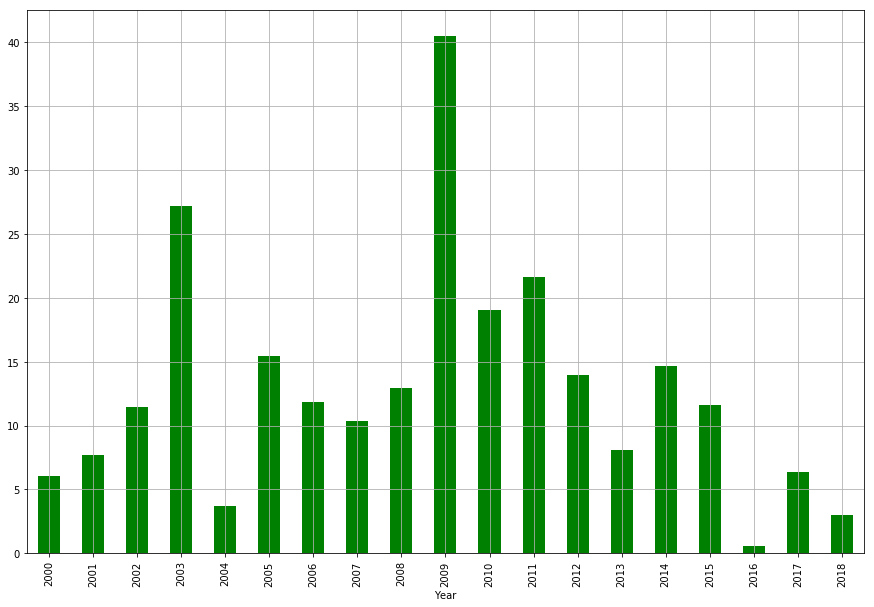

In [13]:
df = monthly_return_table (p_value)
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# PMA003

INCEPTION DATES:

          inception
Symbols            
VCVSX    1999-12-31
VUSTX    1999-12-31
VWEHX    1999-12-31
VWINX    1999-12-31
FIRST BUY DATE = 2000-02-29 00:00:00



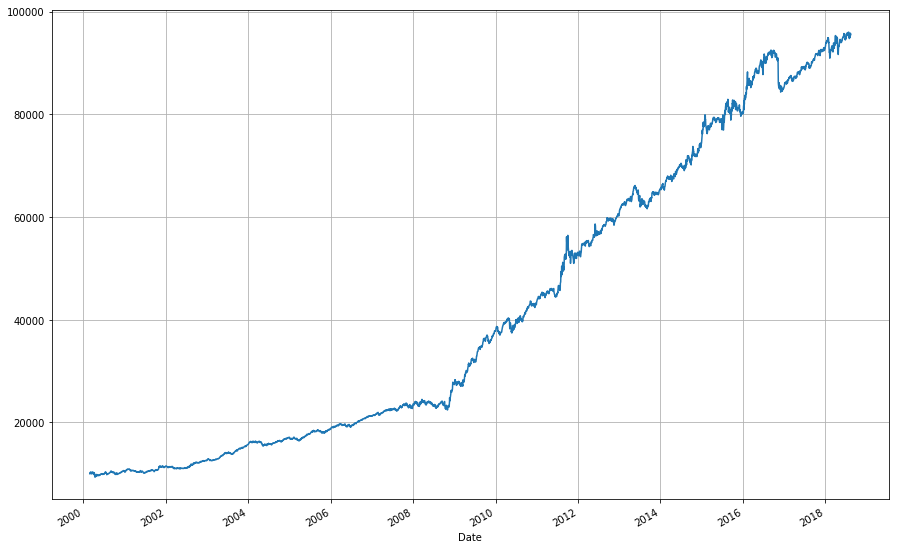

In [14]:
symbols =['VCVSX', 'VWINX', 'VWEHX']
cash_proxy = 'VUSTX'

tickers = list(set(symbols + [cash_proxy]))

start_date = '2000-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Define which online source one should use
data_source = 'yahoo'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = web.DataReader(tickers, data_source, start_date, end_date)
data = panel_data['Adj Close'].sort_index(ascending=True)   
inception_dates = pd.DataFrame([data[ticker].first_valid_index().date() for ticker in data.columns], 
                               index=data.keys(), columns=['inception'])
                               
print ('INCEPTION DATES:\n\n{}'.format(inception_dates))

prices = data.copy().dropna()

end_points = endpoints(period='M', trading_days=prices.index)
prices_m = prices.loc[end_points]

risk_lookback = 3
allocations = [0.6, 0.2, 0.2]

# elligibility rule
# SMA = prices_m.rolling(risk_lookback).mean().dropna()
SMA = prices_m.rolling(risk_lookback).mean().dropna()
rebalance_dates = SMA.index
rule = prices_m.reindex(rebalance_dates)[symbols] > SMA[symbols]

# fixed weight allocation
weights = allocations * rule

# downside protection
weights[cash_proxy] = 1 - weights[symbols].sum(axis=1)

# backtest
p_value, p_holdings, p_weights = backtest(prices, weights, 10000., offset=0, commission=10.)

p_value.plot(figsize=(15,10), grid=True)

In [15]:
# algo stats
ffn.calc_perf_stats(p_value).display()

Stats for None from 2000-02-29 00:00:00 - 2018-08-14 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
855.08%             1.53  13.01%  -9.76%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y     incep.
-----  -----  -----  -----  -----  -----  -----  ------  --------
0.28%  1.17%  3.90%  2.77%  6.86%  5.22%  8.70%  15.10%  13.01%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  1.53     1.55       1.59
mean    12.59%   12.58%     13.26%
vol     8.23%    8.09%      8.31%
skew    0.11     0.87       1.74
kurt    6.03     3.38       3.65
best    4.47%    12.07%     37.94%
worst   -3.45%   -6.47%     2.77%

Drawdowns:
max     avg       # days
------  ------  --------
-9.76%  -1.16%     20.46

Misc:
---------------  -------
avg. up month    1.99%
avg. down month  -1.55%
up year %        100.00%
12m up %         95.28%
--

In [16]:
show_return_table(p_value)

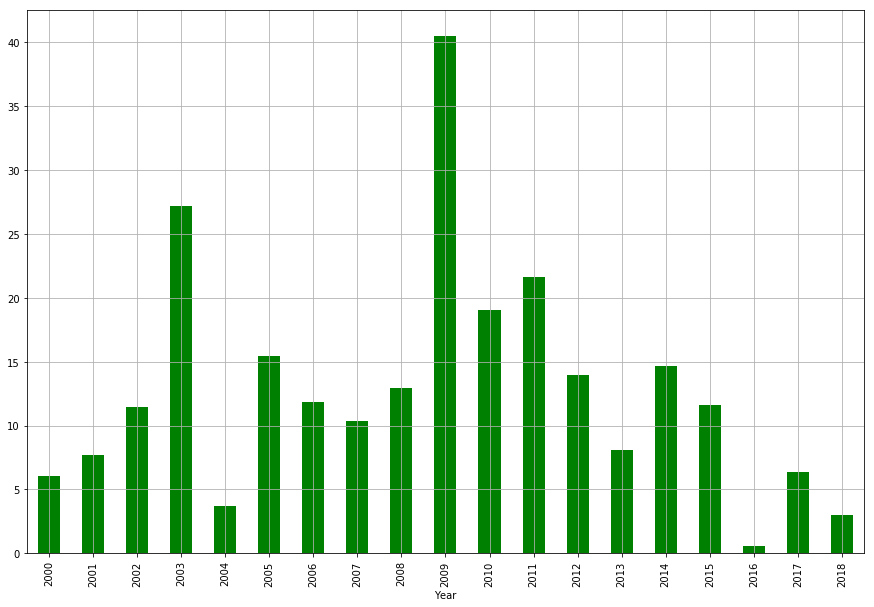

In [17]:
df = monthly_return_table (p_value)
frame = df['Annual Returns'].to_frame()
frame['positive'] = df['Annual Returns'] >= 0
frame['Annual Returns'].plot(figsize=(15,10),kind='bar',color=frame.positive.map({True: 'g', False: 'r'}), grid=True)

# SCRATCHPAD